In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/fly_ai/3주차/법원_판결예측

/content/drive/MyDrive/fly_ai/3주차/법원 판결예측


In [ ]:
!unzip /content/drive/MyDrive/fly_ai/3주차/법원_판결예측/open.zip

Archive:  /content/drive/MyDrive/fly_ai/3주차/법원_판결예측/open.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [8]:
import pandas as pd

In [9]:
train_path = '/content/drive/MyDrive/fly_ai/3주차/법원_판결예측/train.csv'
test_path = '/content/drive/MyDrive/fly_ai/3주차/법원_판결예측/test.csv'
submission_path = '/content/drive/MyDrive/fly_ai/3주차/법원_판결예측/sample_submission.csv'
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
sub = pd.read_csv(submission_path)
train

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1
...,...,...,...,...,...
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",Congress amended the Clean Air Act through the...,1
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.","Alliance Bond Fund, Inc., an investment fund, ...",1
2475,TRAIN_2475,Peguero,United States,"In 1992, the District Court sentenced Manuel D...",0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,"On March 8, 1996, Enrico St. Cyr, a lawful per...",0


In [7]:
from collections import Counter

def count_words(sentence):
    # 문장에서 단어를 추출하고 단어의 빈도를 계산
    words = sentence.split()
    word_counts = Counter(words)
    return word_counts

# 'first_party_winner'가 0인 경우의 'facts' 값을 가져와 문자열로 변환
winner_0_sentences = ' '.join(train[train['first_party_winner'] == 0]['facts'].astype(str).tolist())

# 'first_party_winner'가 1인 경우의 'facts' 값을 가져와 문자열로 변환
winner_1_sentences = ' '.join(train[train['first_party_winner'] == 1]['facts'].astype(str).tolist())

# 각각의 경우에 대해 단어 빈도를 계산
word_counts_0 = count_words(winner_0_sentences)
word_counts_1 = count_words(winner_1_sentences)

# 각각의 경우에 대해 상위 10개의 단어 빈도를 선택
top_10_words_0 = word_counts_0.most_common(10)
top_10_words_1 = word_counts_1.most_common(10)

# 결과 출력
print("Top 10 words for 'first_party_winner' == 0:")
for word, count in top_10_words_0:
    print(f"{word}: {count}")

print("\nTop 10 words for 'first_party_winner' == 1:")
for word, count in top_10_words_1:
    print(f"{word}: {count}")


Top 10 words for 'first_party_winner' == 0:
the: 10872
of: 5085
to: 3859
and: 3375
a: 3173
that: 2927
in: 2187
The: 2091
for: 1897
was: 1624

Top 10 words for 'first_party_winner' == 1:
the: 21492
of: 9950
to: 7890
and: 7093
a: 6279
that: 5855
in: 4636
The: 4178
for: 3719
was: 3377


In [19]:

# # 불용어 제거
stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as",
             "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could",
             "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has",
             "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him",
             "himself",
             "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its",
             "itself",
             "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours",
             "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some",
             "such", "than", "that",
             "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they",
             "they'd", "they'll",
             "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we",
             "we'd", "we'll",
             "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who",
             "who's", "whom",
             "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself",
             "yourselves", "Court", "court", "not", "district", "Appeals", "federal", "state", "U.S.", "Circuit", "District"]
# 불용어 제거 함수
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

# 'facts' 열에 불용어 제거 함수를 적용하고 결과를 'facts' 열에 할당
train['facts'] = train['facts'].apply(remove_stopwords)

In [20]:
from collections import Counter

def count_words(sentence):
    # 문장에서 단어를 추출하고 단어의 빈도를 계산
    words = sentence.split()
    word_counts = Counter(words)
    return word_counts

# 'first_party_winner'가 0인 경우의 'facts' 값을 가져와 문자열로 변환
winner_0_sentences = ' '.join(train[train['first_party_winner'] == 0]['facts'].astype(str).tolist())

# 'first_party_winner'가 1인 경우의 'facts' 값을 가져와 문자열로 변환
winner_1_sentences = ' '.join(train[train['first_party_winner'] == 1]['facts'].astype(str).tolist())

# 각각의 경우에 대해 단어 빈도를 계산
word_counts_0 = count_words(winner_0_sentences)
word_counts_1 = count_words(winner_1_sentences)

# 각각의 경우에 대해 상위 10개의 단어 빈도를 선택
top_10_words_0 = word_counts_0.most_common(10)
top_10_words_1 = word_counts_1.most_common(10)

# 결과 출력
print("Top 10 words for 'first_party_winner' == 0:")
for word, count in top_10_words_0:
    print(f"{word}: {count}")

print("\nTop 10 words for 'first_party_winner' == 1:")
for word, count in top_10_words_1:
    print(f"{word}: {count}")

Top 10 words for 'first_party_winner' == 0:
Appeals: 596
U.S.: 474
Circuit: 468
held: 402
Act: 348
Supreme: 338
filed: 323
found: 264
United: 258
argued: 250

Top 10 words for 'first_party_winner' == 1:
Appeals: 1179
Circuit: 1007
U.S.: 853
Supreme: 805
held: 803
filed: 658
Act: 657
denied: 533
found: 529
trial: 498


In [ ]:
train_df.isnull().sum()

ID                    0
first_party           0
second_party          0
facts                 0
first_party_winner    0
dtype: int64

In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize
import pandas as pd
import re

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.data.path.append("nltk_data")


def text_summarize(text):
    sentences = sent_tokenize(text)
    vectorizer = TfidfVectorizer()
    sentence_vectors = vectorizer.fit_transform(sentences)

    top_n = 1  # 문장 개수
    top_sentence_indices = sentence_vectors.sum(axis=1).argsort()[-top_n:]
    top_sentence_indices.sort()

    summary = " ".join(sentences[i.item()] for i in top_sentence_indices)

    return summary


train = pd.read_csv("/content/drive/MyDrive/fly_ai/3주차/법원_판결예측/train.csv")
train["facts"] = train["facts"].apply(lambda x: text_summarize(x))

test = pd.read_csv("/content/drive/MyDrive/fly_ai/3주차/법원_판결예측/test.csv")
test["facts"] = test["facts"].apply(lambda x: text_summarize(x))

submit = pd.read_csv("/content/drive/MyDrive/fly_ai/3주차/법원_판결예측/sample_submission.csv")

# 부호 제거
def alpha_num(text):
    return re.sub(r"[^A-Za-z0-9 ]", "", text)


# 불용어 제거
stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as",
             "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could",
             "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has",
             "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him",
             "himself",
             "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its",
             "itself",
             "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours",
             "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some",
             "such", "than", "that",
             "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they",
             "they'd", "they'll",
             "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we",
             "we'd", "we'll",
             "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who",
             "who's", "whom",
             "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself",
             "yourselves"]


def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)


# 중복제거
def delete_duplication(text):
    words = text.split()
    unique_words = []

    for word in words:
        if word not in unique_words:
            unique_words.append(word)

    result = " ".join(unique_words)
    return result


train["facts"] = train["facts"].str.lower()
test["facts"] = test["facts"].str.lower()
train["facts"] = train["facts"].apply(alpha_num).apply(delete_duplication)
test["facts"] = test["facts"].apply(alpha_num).apply(delete_duplication)

In [ ]:
vectorizer = TfidfVectorizer()

def get_vector(vectorizer, df, train_mode):
    if train_mode:
        X_facts = vectorizer.fit_transform(df["facts"])
    else:
        X_facts = vectorizer.transform(df["facts"])
    X_party1 = vectorizer.transform(df["first_party"])
    X_party2 = vectorizer.transform(df["second_party"])

    X = np.concatenate([X_party1.toarray(), X_party2.toarray(), X_facts.toarray()], axis=1)
    return X

X = get_vector(vectorizer, train, True)
y = train["first_party_winner"]

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = MLPRegressor(hidden_layer_sizes=300)
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=300)

In [ ]:
X_test = get_vector(vectorizer, test, False)
pred = model.predict(X_test)
submit["first_party_winner"] = pred
submit["first_party_winner"] = submit["first_party_winner"].apply(lambda x: 1 if x >= 0.5 else 0)

In [ ]:
test.columns

Index(['ID', 'first_party', 'second_party', 'facts'], dtype='object')

In [ ]:
submit.to_csv("summarize_mlp_r_submit.csv", index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample

In [ ]:
train["contents"] = train["first_party"] + "," + train["second_party"] + "," + train["facts"]
test["contents"] = test["first_party"] + "," + test["second_party"] + "," + test["facts"]

train = train[["contents", "first_party_winner"]]
test = test[["contents"]]

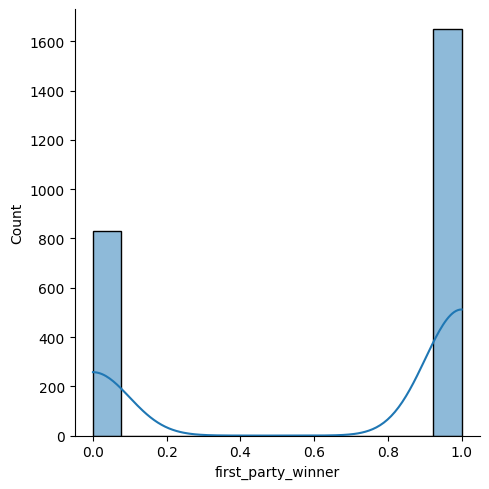

In [ ]:
sns.displot(train["first_party_winner"], kde=True);

In [ ]:
# 0과 1데이터 불균형 -> 1 다운 샘플링
subset_0 = train[train["first_party_winner"] == 0]
subset_1 = train[train["first_party_winner"] == 1]

subset_1_downsampled = resample(subset_1,
                                replace=False,
                                n_samples=800,
                                random_state=42)

train = pd.concat([subset_0, subset_1_downsampled])

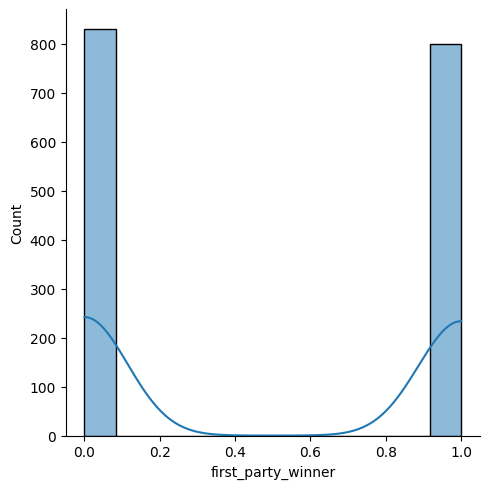

In [ ]:
sns.displot(train["first_party_winner"], kde=True)

In [ ]:
train.head()

,contents,first_party_winner
1,"Stephen Duncan,Lawrence Owens,Ramon Nelson was...",0
3,"Linkletter,Walker,Victor Linkletter was convic...",0
14,"James J. Thole, et al.,U.S. Bank, N.A., et al....",0
16,"Plyler,Doe,A revision to the Texas education l...",0
21,"Bassam Yacoub Salman,United States,Maher Kara ...",0


In [ ]:
y = train["first_party_winner"]
X = train["contents"]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
# Initialising bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name="text")
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

In [ ]:
# Initialising neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs["pooled_output"])
l = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(l)

In [ ]:
# Create model
model = tf.keras.Model(inputs=[text_input], outputs = [l])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_type_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [ ]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name="accuracy")
]

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=METRICS
    )

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
36/36 [==============================] - 25s 336ms/step - loss: 0.7073 - accuracy: 0.5184
Epoch 2/10
36/36 [==============================] - 12s 326ms/step - loss: 0.7070 - accuracy: 0.5123
Epoch 3/10
36/36 [==============================] - 12s 327ms/step - loss: 0.6990 - accuracy: 0.5202
Epoch 4/10
36/36 [==============================] - 12s 336ms/step - loss: 0.7219 - accuracy: 0.5175
Epoch 5/10
36/36 [==============================] - 13s 355ms/step - loss: 0.7092 - accuracy: 0.5368
Epoch 6/10
36/36 [==============================] - 12s 344ms/step - loss: 0.6971 - accuracy: 0.5167
Epoch 7/10
36/36 [==============================] - 13s 358ms/step - loss: 0.7026 - accuracy: 0.5070
Epoch 8/10
36/36 [==============================] - 13s 353ms/step - loss: 0.6946 - accuracy: 0.5254
Epoch 9/10
36/36 [==============================] - 12s 346ms/step - loss: 0.7012 - accuracy: 0.5307
Epoch 10/10
36/36 [==============================] - 13s 357ms/step - loss: 0.7030 - accura

In [ ]:
y_pred = model.predict(test)

sub["first_party_winner"] = y_pred
sub["first_party_winner"] = sub["first_party_winner"].apply(lambda x: 1 if x >= 0.5 else 0)
sub.to_csv("bert_submit.csv", index=False)

39/39 [==============================] - 15s 377ms/step
